In [272]:
import pandas as pd
import numpy as np
import re
import nltk
import string
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline

pal = sns.color_palette()

In [271]:
train = pd.read_csv('train.csv').dropna()

In [250]:
train.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [254]:
test = pd.read_csv('test.csv').dropna()

In [255]:
test.head()

,test_id,question1,question2
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?
2,2,What but is the best way to send money from Ch...,What you send money to China?
3,3,Which food not emulsifiers?,What foods fibre?
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?


In [251]:
stemmer = SnowballStemmer("english", ignore_stopwords=True)

In [252]:
def build_vocab(datasets):
  vocab = dict()
  
  for data in datasets:
        wordList = re.sub("[^\w]", " ",  data).lower().split()
#         wordList = [word for word in wordList if word not in stopwords.words('english')]
        for word in wordList:
            word = stemmer.stem(word)
            if word not in vocab and word not in stopwords.words('english'):
                vocab[word] = len(vocab)

  print('Vocab size: {}'.format(len(vocab)))

  return vocab

In [202]:
# question1_vocab = build_vocab(train.question1)

In [203]:
# question2_vocab = build_vocab(train.question2)

In [253]:
total_vocab = build_vocab(np.append(train.question1, train.question2))

Vocab size: 64744


In [265]:
# EDA

qids = pd.Series(train['qid1'].tolist() + train['qid2'].tolist())

print('Total number of question pairs for training: {}'.format(len(train)))
print('Duplicate pairs: {}%'.format(round(train['is_duplicate'].mean()*100, 2)))
print('Total number of questions in the training data: {}'.format(len(
    np.unique(qids))))
print('Number of questions that appear multiple times: {}'.format(np.sum(qids.value_counts() > 1)))


Total number of question pairs for training: 404287
Duplicate pairs: 36.92%
Total number of questions in the training data: 537929
Number of questions that appear multiple times: 111778


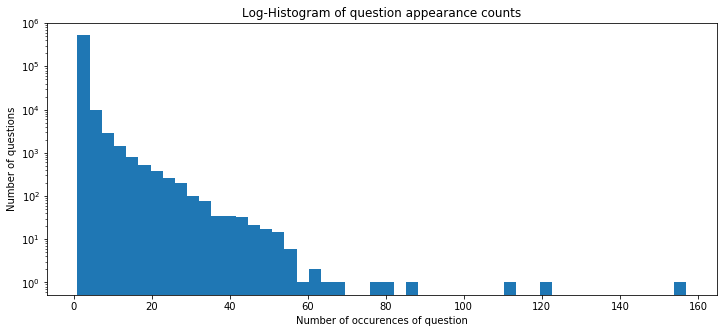

In [267]:
plt.figure(figsize=(12, 5))
plt.hist(qids.value_counts(), bins=50)
plt.yscale('log', nonposy='clip')
plt.title('Log-Histogram of question appearance counts')
plt.xlabel('Number of occurences of question')
plt.ylabel('Number of questions')
plt.show()

In [273]:
train_qs = pd.Series(train['question1'].tolist() + train['question2'].tolist()).astype(str)
test_qs = pd.Series(test['question1'].tolist() + test['question2'].tolist()).astype(str)


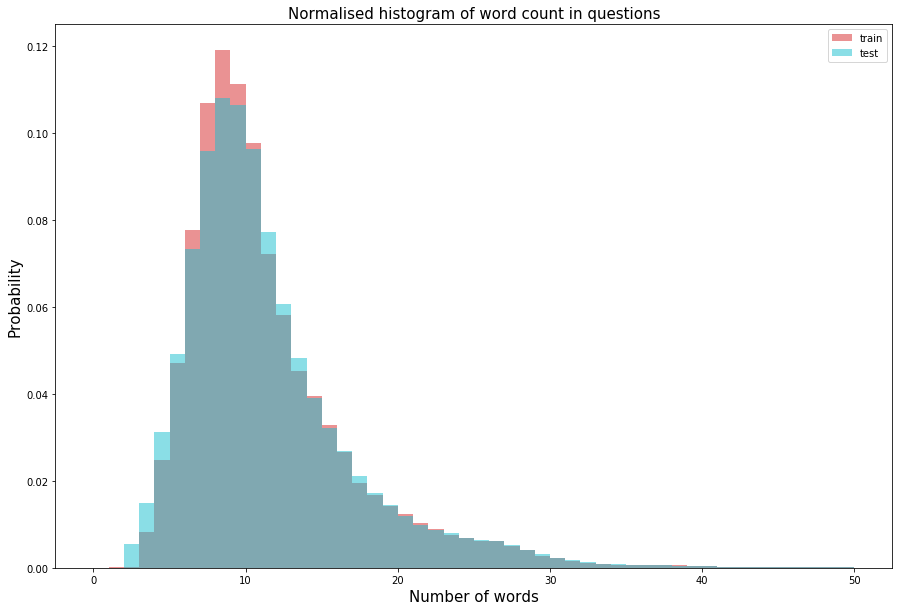

mean-train 11.06 std-train 5.89 mean-test 11.02 std-test 5.84 max-train 237.00 max-test 238.00


In [283]:
dist_train = train_qs.apply(lambda x: len(x.split(' ')))
dist_test = test_qs.apply(lambda x: len(x.split(' ')))

plt.figure(figsize=(15, 10))
plt.hist(dist_train, bins=50, range=[0, 50], color=pal[3], normed=True, alpha = 0.5, label='train')
plt.hist(dist_test, bins=50, range=[0, 50], color=pal[9], normed=True, alpha=0.5, label='test')
plt.title('Normalised histogram of word count in questions', fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Probability', fontsize=15)
plt.show()

print('mean-train {:.2f} std-train {:.2f} mean-test {:.2f} std-test {:.2f} max-train {:.2f} max-test {:.2f}'.format(dist_train.mean(), 
                          dist_train.std(), dist_test.mean(), dist_test.std(), dist_train.max(), dist_test.max()))

(-0.5, 1439.5, 1079.5, -0.5)

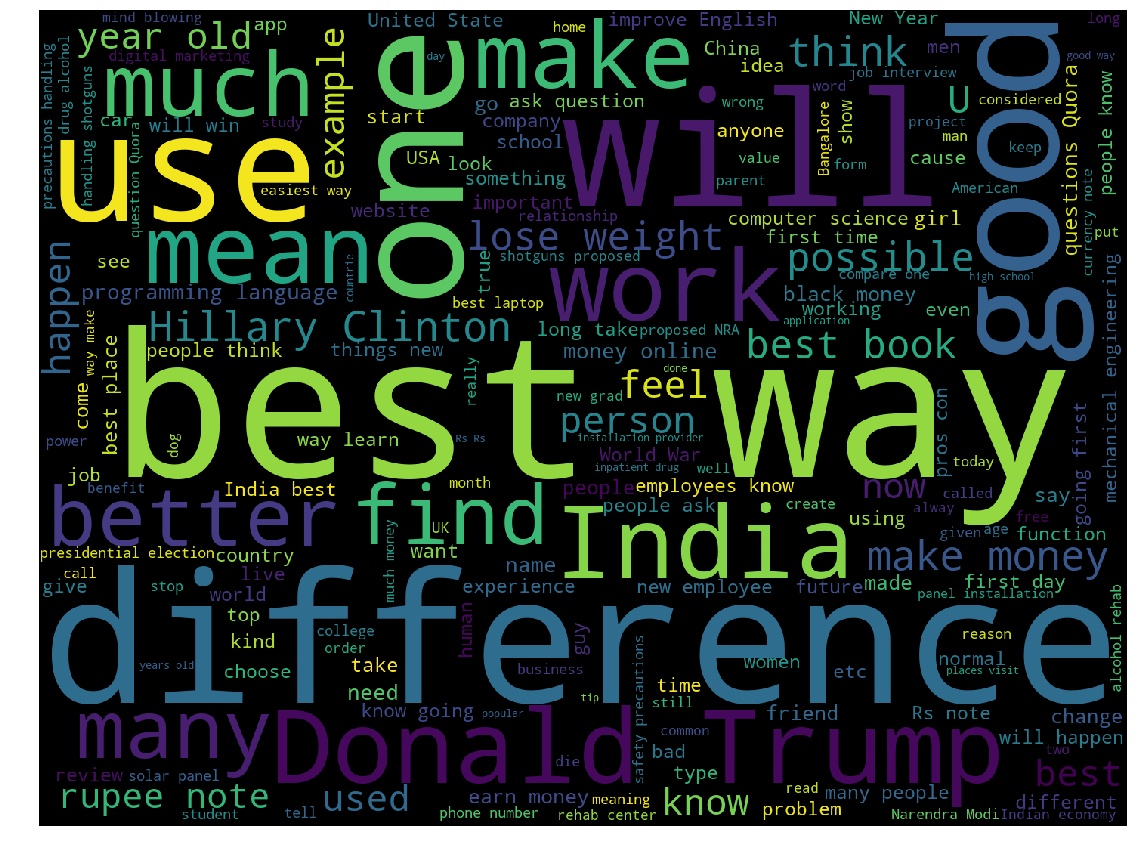

In [285]:
from wordcloud import WordCloud
cloud = WordCloud(width=1440, height=1080).generate(" ".join(train_qs.astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')